In [82]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [83]:
# Number of pairs feature/label.
M = 100

In [84]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (features)
x1 = np.random.randn(M, 1)

x2 = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y = x1 + x2

In [85]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

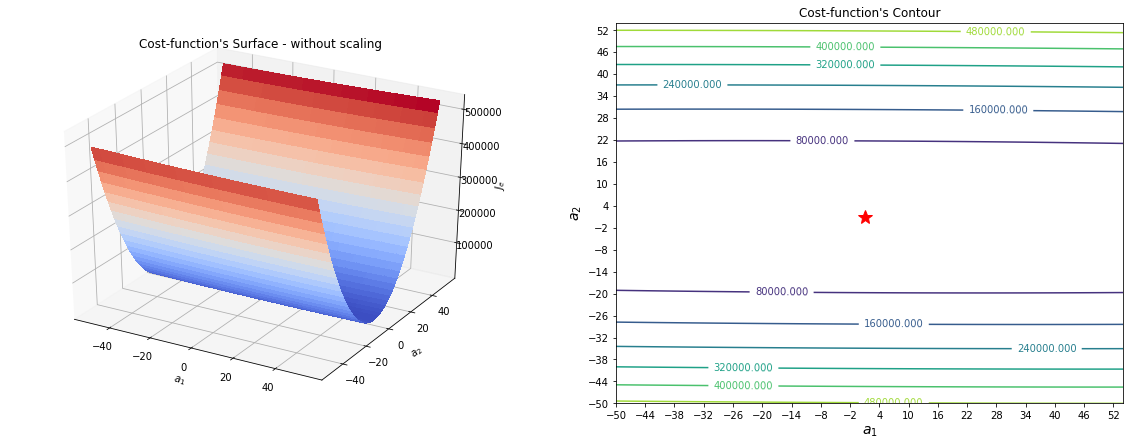

In [86]:
# Generate values for parameter space.
N = 200
a1 = np.linspace(-50.0, 54.0, N)
a2 = np.linspace(-50.0, 54.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface without feature scaling.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2    
        J[iter1][iter2] = (1/M)*np.sum(np.square(y - yhat))

# Plot cost-function surface.
fig = plt.figure(figsize=(20, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - without scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-50, 54, step=6.0))
ax.set_yticks(np.arange(-50, 54, step=6.0))

#Show the plot.
plt.show()

In [87]:
# Import Class StandardScaler from module Preprocessing of library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Concatenate both column vectors.
X = np.c_[x1, x2]

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

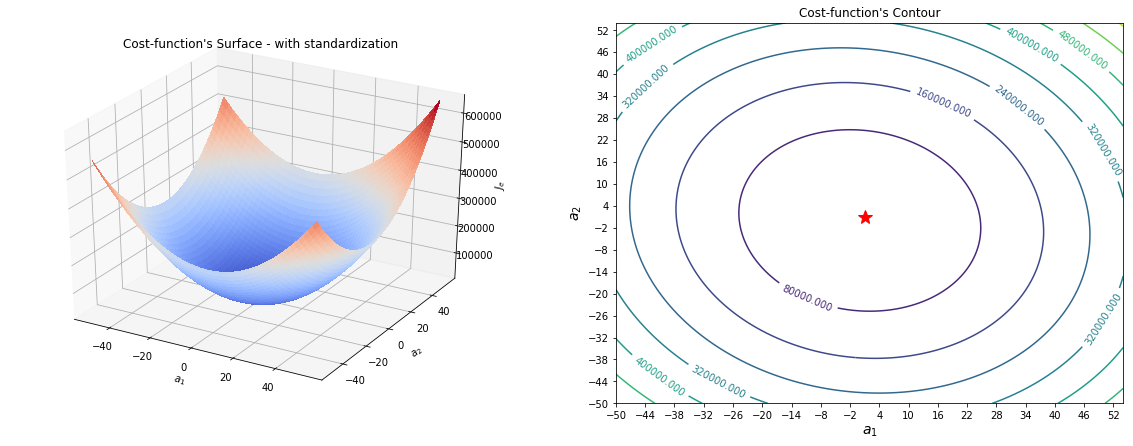

In [88]:
# Generate points for plotting the cost-function surface with feature scaling.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*scaled_X[:,0] + A2[iter1][iter2]*scaled_X[:,1]
        J[iter1][iter2] = (1/M)*np.sum(np.square(y - yhat))

# Plot cost-function surface.
fig = plt.figure(figsize=(20, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with standardization')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-50, 54, step=6.0))
ax.set_yticks(np.arange(-50, 54, step=6.0))

#Show the plot.
plt.show()

In [89]:
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMax scaler.
minMaxScaler = MinMaxScaler()

# Concatenate both column vectors.
X = np.c_[x1, x2]

# Standardize the features.
scaled_X = minMaxScaler.fit_transform(X)

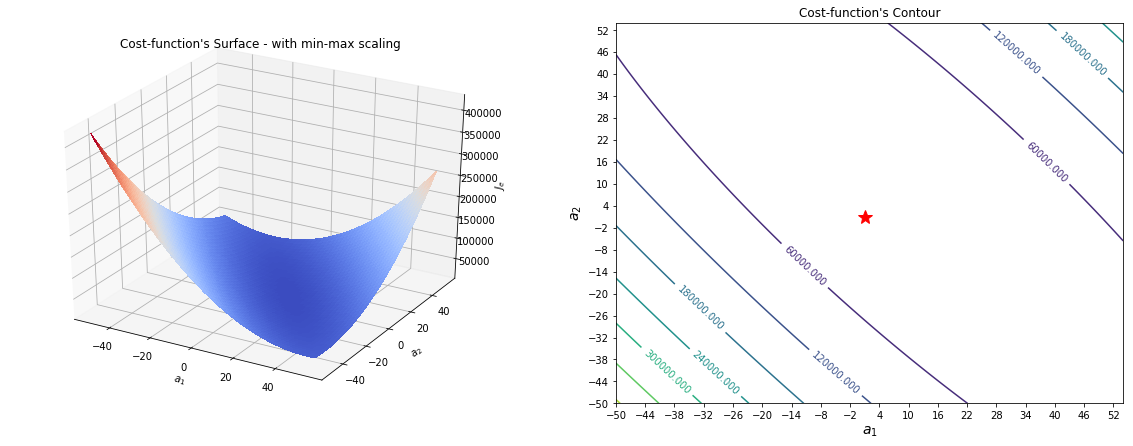

In [90]:
# Generate points for plotting the cost-function surface with feature scaling.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*scaled_X[:,0] + A2[iter1][iter2]*scaled_X[:,1]
        J[iter1][iter2] = (1/M)*np.sum(np.square(y - yhat))

# Plot cost-function surface.
fig = plt.figure(figsize=(20, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-50, 54, step=6.0))
ax.set_yticks(np.arange(-50, 54, step=6.0))

#Show the plot.
plt.show()